<a href="https://colab.research.google.com/github/amirrhseiin/Bank-Customer-Churn-Prediction-Model/blob/main/Customer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Dense, Dropout, Input, Average
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical, plot_model
from keras.models import Model
from keras.optimizers import SGD
from keras import optimizers
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
all_datas= pd.read_csv('F:\Proj1_Data.csv')
dataset = all_datas.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)
Gender= pd.get_dummies(all_datas.Gender)
Geography = pd.get_dummies(all_datas.Geography)
dataset= pd.concat([dataset, Gender, Geography], axis =1)
dataset.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Female               uint8
Male                 uint8
France               uint8
Germany              uint8
Spain                uint8
dtype: object

In [ ]:
Y= dataset.Exited
X= dataset.drop(['Exited'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 20)
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)
Sscaler= StandardScaler()
X_train= Sscaler.fit_transform(X_train)
X_test= Sscaler.transform(X_test)

(8000, 13) (2000, 13) (8000,) (2000,)


In [ ]:
input_layer=Input(shape=X_train.shape[1], name='Input')
hidden_layer_1= Dense(14, activation='relu', name='first_layer')(input_layer)
hidden_layer_2= Dense(16, activation='relu', name='second_layer')(hidden_layer_1)
dropout_layer= Dropout(0.2)(hidden_layer_2)
output_layer= Dense(1, activation='sigmoid', name='out_layer')(dropout_layer)
model= Model(inputs=input_layer , outputs=output_layer, name='model_1')

model.save("project_1")

INFO:tensorflow:Assets written to: project_1\assets


In [ ]:
sgd=optimizers.SGD(learning_rate=0.008, momentum= 0.7)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,Y_train, batch_size=500, epochs=500, verbose=2, validation_split=0.2)

Epoch 1/500
13/13 - 0s - loss: 0.5733 - accuracy: 0.7513 - val_loss: 0.5323 - val_accuracy: 0.7962
Epoch 2/500
13/13 - 0s - loss: 0.5484 - accuracy: 0.7708 - val_loss: 0.5116 - val_accuracy: 0.8025
Epoch 3/500
13/13 - 0s - loss: 0.5320 - accuracy: 0.7830 - val_loss: 0.4987 - val_accuracy: 0.8019
Epoch 4/500
13/13 - 0s - loss: 0.5247 - accuracy: 0.7839 - val_loss: 0.4894 - val_accuracy: 0.8019
Epoch 5/500
13/13 - 0s - loss: 0.5221 - accuracy: 0.7828 - val_loss: 0.4821 - val_accuracy: 0.8019
Epoch 6/500
13/13 - 0s - loss: 0.5139 - accuracy: 0.7856 - val_loss: 0.4762 - val_accuracy: 0.8025
Epoch 7/500
13/13 - 0s - loss: 0.5085 - accuracy: 0.7873 - val_loss: 0.4706 - val_accuracy: 0.8019
Epoch 8/500
13/13 - 0s - loss: 0.5009 - accuracy: 0.7894 - val_loss: 0.4658 - val_accuracy: 0.8019
Epoch 9/500
13/13 - 0s - loss: 0.4972 - accuracy: 0.7884 - val_loss: 0.4615 - val_accuracy: 0.8025
Epoch 10/500
13/13 - 0s - loss: 0.4972 - accuracy: 0.7920 - val_loss: 0.4576 - val_accuracy: 0.8037
Epoch 11/

13/13 - 0s - loss: 0.4413 - accuracy: 0.8080 - val_loss: 0.4083 - val_accuracy: 0.8225
Epoch 84/500
13/13 - 0s - loss: 0.4449 - accuracy: 0.8091 - val_loss: 0.4081 - val_accuracy: 0.8225
Epoch 85/500
13/13 - 0s - loss: 0.4425 - accuracy: 0.8072 - val_loss: 0.4080 - val_accuracy: 0.8219
Epoch 86/500
13/13 - 0s - loss: 0.4403 - accuracy: 0.8100 - val_loss: 0.4077 - val_accuracy: 0.8225
Epoch 87/500
13/13 - 0s - loss: 0.4415 - accuracy: 0.8081 - val_loss: 0.4077 - val_accuracy: 0.8219
Epoch 88/500
13/13 - 0s - loss: 0.4424 - accuracy: 0.8087 - val_loss: 0.4075 - val_accuracy: 0.8219
Epoch 89/500
13/13 - 0s - loss: 0.4405 - accuracy: 0.8075 - val_loss: 0.4073 - val_accuracy: 0.8225
Epoch 90/500
13/13 - 0s - loss: 0.4393 - accuracy: 0.8066 - val_loss: 0.4071 - val_accuracy: 0.8238
Epoch 91/500
13/13 - 0s - loss: 0.4383 - accuracy: 0.8087 - val_loss: 0.4068 - val_accuracy: 0.8250
Epoch 92/500
13/13 - 0s - loss: 0.4417 - accuracy: 0.8080 - val_loss: 0.4067 - val_accuracy: 0.8250
Epoch 93/500


Epoch 165/500
13/13 - 0s - loss: 0.4218 - accuracy: 0.8194 - val_loss: 0.3940 - val_accuracy: 0.8319
Epoch 166/500
13/13 - 0s - loss: 0.4214 - accuracy: 0.8214 - val_loss: 0.3938 - val_accuracy: 0.8319
Epoch 167/500
13/13 - 0s - loss: 0.4200 - accuracy: 0.8222 - val_loss: 0.3936 - val_accuracy: 0.8319
Epoch 168/500
13/13 - 0s - loss: 0.4231 - accuracy: 0.8217 - val_loss: 0.3934 - val_accuracy: 0.8319
Epoch 169/500
13/13 - 0s - loss: 0.4252 - accuracy: 0.8178 - val_loss: 0.3933 - val_accuracy: 0.8319
Epoch 170/500
13/13 - 0s - loss: 0.4163 - accuracy: 0.8258 - val_loss: 0.3930 - val_accuracy: 0.8313
Epoch 171/500
13/13 - 0s - loss: 0.4198 - accuracy: 0.8219 - val_loss: 0.3929 - val_accuracy: 0.8300
Epoch 172/500
13/13 - 0s - loss: 0.4194 - accuracy: 0.8248 - val_loss: 0.3926 - val_accuracy: 0.8313
Epoch 173/500
13/13 - 0s - loss: 0.4213 - accuracy: 0.8223 - val_loss: 0.3925 - val_accuracy: 0.8306
Epoch 174/500
13/13 - 0s - loss: 0.4199 - accuracy: 0.8241 - val_loss: 0.3922 - val_accurac

13/13 - 0s - loss: 0.3952 - accuracy: 0.8341 - val_loss: 0.3668 - val_accuracy: 0.8512
Epoch 247/500
13/13 - 0s - loss: 0.3957 - accuracy: 0.8347 - val_loss: 0.3663 - val_accuracy: 0.8512
Epoch 248/500
13/13 - 0s - loss: 0.3939 - accuracy: 0.8345 - val_loss: 0.3658 - val_accuracy: 0.8519
Epoch 249/500
13/13 - 0s - loss: 0.3951 - accuracy: 0.8348 - val_loss: 0.3653 - val_accuracy: 0.8519
Epoch 250/500
13/13 - 0s - loss: 0.3943 - accuracy: 0.8334 - val_loss: 0.3648 - val_accuracy: 0.8512
Epoch 251/500
13/13 - 0s - loss: 0.3931 - accuracy: 0.8391 - val_loss: 0.3644 - val_accuracy: 0.8506
Epoch 252/500
13/13 - 0s - loss: 0.3933 - accuracy: 0.8375 - val_loss: 0.3639 - val_accuracy: 0.8512
Epoch 253/500
13/13 - 0s - loss: 0.3910 - accuracy: 0.8386 - val_loss: 0.3635 - val_accuracy: 0.8512
Epoch 254/500
13/13 - 0s - loss: 0.3918 - accuracy: 0.8364 - val_loss: 0.3629 - val_accuracy: 0.8512
Epoch 255/500
13/13 - 0s - loss: 0.3943 - accuracy: 0.8369 - val_loss: 0.3624 - val_accuracy: 0.8519
Epoc

Epoch 328/500
13/13 - 0s - loss: 0.3672 - accuracy: 0.8473 - val_loss: 0.3348 - val_accuracy: 0.8669
Epoch 329/500
13/13 - 0s - loss: 0.3674 - accuracy: 0.8472 - val_loss: 0.3346 - val_accuracy: 0.8681
Epoch 330/500
13/13 - 0s - loss: 0.3709 - accuracy: 0.8452 - val_loss: 0.3344 - val_accuracy: 0.8681
Epoch 331/500
13/13 - 0s - loss: 0.3690 - accuracy: 0.8469 - val_loss: 0.3342 - val_accuracy: 0.8687
Epoch 332/500
13/13 - 0s - loss: 0.3669 - accuracy: 0.8495 - val_loss: 0.3340 - val_accuracy: 0.8700
Epoch 333/500
13/13 - 0s - loss: 0.3690 - accuracy: 0.8481 - val_loss: 0.3337 - val_accuracy: 0.8700
Epoch 334/500
13/13 - 0s - loss: 0.3685 - accuracy: 0.8484 - val_loss: 0.3335 - val_accuracy: 0.8700
Epoch 335/500
13/13 - 0s - loss: 0.3669 - accuracy: 0.8486 - val_loss: 0.3333 - val_accuracy: 0.8694
Epoch 336/500
13/13 - 0s - loss: 0.3650 - accuracy: 0.8512 - val_loss: 0.3331 - val_accuracy: 0.8694
Epoch 337/500
13/13 - 0s - loss: 0.3662 - accuracy: 0.8472 - val_loss: 0.3328 - val_accurac

13/13 - 0s - loss: 0.3565 - accuracy: 0.8495 - val_loss: 0.3253 - val_accuracy: 0.8712
Epoch 410/500
13/13 - 0s - loss: 0.3577 - accuracy: 0.8511 - val_loss: 0.3252 - val_accuracy: 0.8719
Epoch 411/500
13/13 - 0s - loss: 0.3582 - accuracy: 0.8508 - val_loss: 0.3252 - val_accuracy: 0.8712
Epoch 412/500
13/13 - 0s - loss: 0.3603 - accuracy: 0.8483 - val_loss: 0.3252 - val_accuracy: 0.8706
Epoch 413/500
13/13 - 0s - loss: 0.3588 - accuracy: 0.8522 - val_loss: 0.3251 - val_accuracy: 0.8719
Epoch 414/500
13/13 - 0s - loss: 0.3557 - accuracy: 0.8514 - val_loss: 0.3250 - val_accuracy: 0.8712
Epoch 415/500
13/13 - 0s - loss: 0.3625 - accuracy: 0.8492 - val_loss: 0.3250 - val_accuracy: 0.8719
Epoch 416/500
13/13 - 0s - loss: 0.3570 - accuracy: 0.8509 - val_loss: 0.3251 - val_accuracy: 0.8712
Epoch 417/500
13/13 - 0s - loss: 0.3573 - accuracy: 0.8550 - val_loss: 0.3250 - val_accuracy: 0.8719
Epoch 418/500
13/13 - 0s - loss: 0.3579 - accuracy: 0.8519 - val_loss: 0.3249 - val_accuracy: 0.8712
Epoc

Epoch 491/500
13/13 - 0s - loss: 0.3529 - accuracy: 0.8548 - val_loss: 0.3235 - val_accuracy: 0.8712
Epoch 492/500
13/13 - 0s - loss: 0.3530 - accuracy: 0.8522 - val_loss: 0.3235 - val_accuracy: 0.8725
Epoch 493/500
13/13 - 0s - loss: 0.3570 - accuracy: 0.8503 - val_loss: 0.3235 - val_accuracy: 0.8706
Epoch 494/500
13/13 - 0s - loss: 0.3544 - accuracy: 0.8500 - val_loss: 0.3235 - val_accuracy: 0.8725
Epoch 495/500
13/13 - 0s - loss: 0.3523 - accuracy: 0.8516 - val_loss: 0.3234 - val_accuracy: 0.8719
Epoch 496/500
13/13 - 0s - loss: 0.3529 - accuracy: 0.8534 - val_loss: 0.3234 - val_accuracy: 0.8719
Epoch 497/500
13/13 - 0s - loss: 0.3538 - accuracy: 0.8512 - val_loss: 0.3234 - val_accuracy: 0.8719
Epoch 498/500
13/13 - 0s - loss: 0.3549 - accuracy: 0.8517 - val_loss: 0.3233 - val_accuracy: 0.8719
Epoch 499/500
13/13 - 0s - loss: 0.3546 - accuracy: 0.8514 - val_loss: 0.3234 - val_accuracy: 0.8719
Epoch 500/500
13/13 - 0s - loss: 0.3549 - accuracy: 0.8537 - val_loss: 0.3235 - val_accurac

<function matplotlib.pyplot.show(close=None, block=None)>

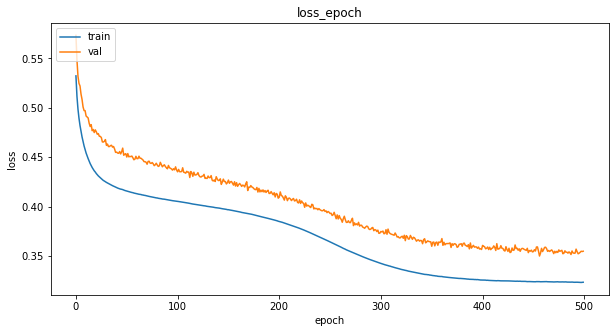

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss_epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

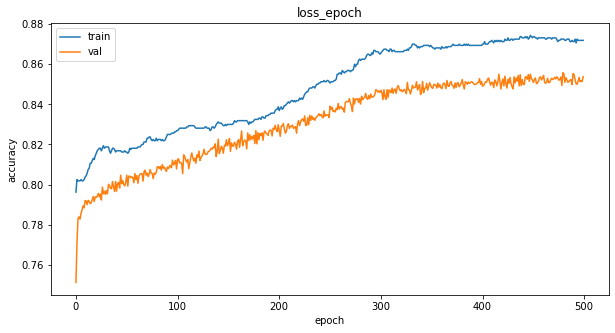

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('loss_epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'], loc='upper left')
plt.show

In [ ]:
y_pred = model.predict(X_test)
score = accuracy_score(y_pred.astype('int'), Y_test.astype('int'))
print(round(score*100, 2))

81.15


In [ ]:
print(classification_report(Y_test.astype('int'), y_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1623
           1       0.00      0.00      0.00       377

    accuracy                           0.81      2000
   macro avg       0.41      0.50      0.45      2000
weighted avg       0.66      0.81      0.73      2000



C:\Users\Admin\anaconda3\envs\first_pro\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
